In [2]:
%matplotlib inline
%load_ext autoreload

In [4]:
# import the necessary packages
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from imutils import paths
import numpy as np
import imutils
import cv2
import os
import random
from keras import backend as K

In [5]:
import image_data as imdg

print("[INFO] Leyendo imagenes ...")
# initialize the data matrix and labels list
data = []
labels = []

data_train = []
label_train = []

# Parametros obligatorios : 1-Directorio Raiz 
# Parametros optativos : 2-Width / 3-Height / 4-Canales / 5-Color

relevant_path = "data/train/"
data_train, labels_train = imdg.get_data_flatten(relevant_path)
print('Cantidad imagenes training : ', len(data_train))


[INFO] Leyendo imagenes ...
Cantidad imagenes training :  248


In [6]:
#print image samples
print(data_train[0].shape)


(512,)


In [7]:
# encode the labels, converting them from strings to integers
le = LabelEncoder()
labels = le.fit_transform(labels_train)
print(labels)
print(le.classes_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1]


In [8]:
# partition the data into training and valid splits, using 75%
# of the data for training and the remaining 25% for testing
print("[INFO] constructing training/valid split...")
(trainData, validData, trainLabels, validLabels) = train_test_split(np.array(data_train), labels_train, test_size=0.25, random_state=42)
 
# train the linear regression clasifier
print("[INFO] training Linear SVM classifier...")
C = 1.0
model_clf = SVC(kernel='linear', C=C, probability=True, random_state=0)
model_clf.fit(trainData, trainLabels)
    
# evaluate the classifier
print("[INFO] evaluating classifier...")
predictionsLabels = model_clf.predict(validData)

# Compare with the builtin predict
print(model_clf.predict(validData))

[INFO] constructing training/valid split...
[INFO] training Linear SVM classifier...
[INFO] evaluating classifier...
[0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1]


In [9]:
print(classification_report(validLabels, predictionsLabels))

             precision    recall  f1-score   support

          0       0.93      0.84      0.88        31
          1       0.85      0.94      0.89        31

avg / total       0.89      0.89      0.89        62



In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion_matrix(validLabels,predictionsLabels),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1
Class 0                 26                  5
Class 1                  2                 29


In [11]:
model_clf.decision_function(validData)
model_clf.predict(validData)

array([0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

In [12]:
# Calculo el score del dataset de entrenamiento
score_train_clf = model_clf.score(trainData, trainLabels)

# Calculo el score del dataset de validacion
score_valid_clf = model_clf.score(validData, validLabels)

print("Train Accuracy: %1.4f" %  score_train_clf)
print("Test Accuracy: %1.4f" %  score_valid_clf)
print('Coeficientes:', model_clf.coef_)
print('Intercept:', model_clf.intercept_)


Train Accuracy: 0.8548
Test Accuracy: 0.8871
Coeficientes: [[  5.85163906e-01   1.05833511e+00   1.65282406e-01  -6.84202883e-01
    4.46231884e-01   4.68050742e-01   2.19281964e+00   2.17528853e+00
   -6.86357148e-04  -1.01775521e-02  -1.56890129e-02  -1.80366337e-03
    2.29185940e-03   5.22082672e-03   6.21715473e-04   0.00000000e+00
   -2.43247861e-03  -5.01119671e-03  -3.98768971e-05   5.73411908e-05
    1.83883548e-03   5.86366921e-04   0.00000000e+00   0.00000000e+00
   -1.19207286e-03  -2.65845971e-04   0.00000000e+00   0.00000000e+00
    2.16008819e-04   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.31706341e-04  -2.65845974e-05   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -8.45598489e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.81286121e-06   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000

In [13]:
# use the model to predict the labels of the validation data
predictedLabels = model_clf.predict(validData)
print(predictedLabels)

expectedLabels = validLabels
print(expectedLabels)

# Nro. predicciones correctas
matches = (predictedLabels == expectedLabels)
print('Labels : Predicted = Expected ' , matches.sum())


[0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1]
[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]
Labels : Predicted = Expected  55


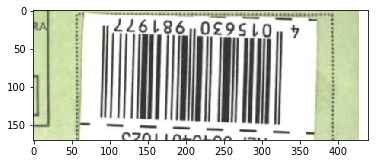

Prediction Ejem:  [1]
Troquel OK


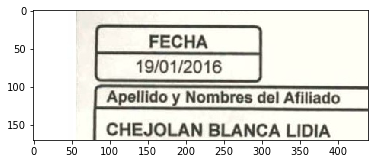

Prediction Ejem:  [0]
Troquel NOK


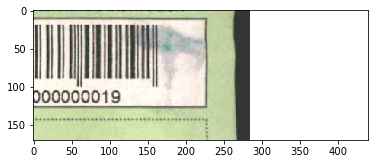

Prediction Ejem:  [1]
Troquel OK


In [15]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import image_data as imdg

def get_predic_image(test_img):
    test_image = cv2.imread(test_img)
    plt.imshow(test_image)
    plt.show()
    arr_test = [] 
    arr_test = imdg.get_image_flatten(test_img)
    pred = model_clf.predict(arr_test)
   
    print('Prediction Ejem: ', pred)

    if pred[0] == 1:    
       prediction = 'Troquel OK' 
    else:    
       prediction = 'Troquel NOK' 
    
    print (prediction)
    
    return pred

## IMAGEN DE TROQUEL NOK 
result = get_predic_image('data/test/1/barcode83.jpg')

## IMAGEN DE TROQUEL NOK 
result = get_predic_image('data/test/0/barcode68.jpg')

## 2do CASO TROQUEL NOK 
result = get_predic_image('data/test/0/barcode797.jpg')


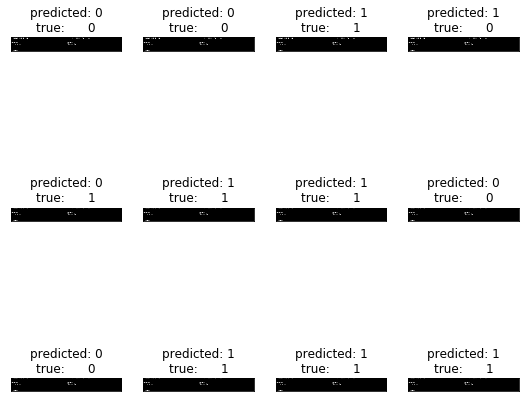

In [73]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image

def array2PIL(arr, size):
    mode = 'RGBA'
    arr = arr.reshape(arr.shape[0], arr.shape[1])
    if len(arr[0]) == 3:
        arr = numpy.c_[arr, 255*numpy.ones((len(arr),1), numpy.uint8)]
    return Image.frombuffer(mode, size, arr.tostring(), 'raw', mode, 0, 1)

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        img = Image.fromarray(images, 'L')
        plt.imshow(np.asarray(img), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, i):
    pred_name = y_pred[i]
    true_name = y_test[i]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(predictedLabels, validLabels, i)
                     for i in range(predictedLabels.shape[0])]

h = 150
w = 512 

plot_gallery(validData, prediction_titles, h, w)

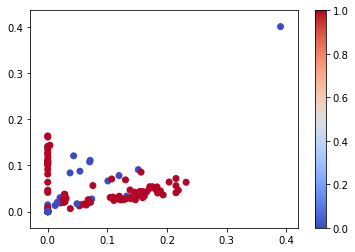

In [16]:
import matplotlib.pyplot as plt

plt.scatter(trainData[:,0], trainData[:,1], c = trainLabels, cmap='coolwarm');
plt.colorbar()

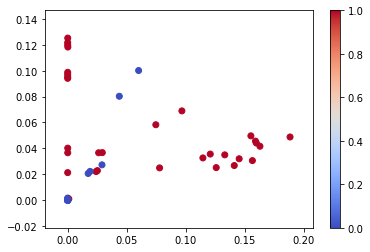

In [17]:
plt.scatter(validData[:,0], validData[:,1], c = validLabels, cmap='coolwarm');
plt.colorbar()

In [ ]:
## LOGISTIC REGRESSION  - NAIVE BAYES

In [18]:
# Importo modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [19]:
import image_data as imdg

print("[INFO] Leyendo imagenes ...")
# initialize the data matrix and labels list
data = []
labels = []

data_train = []
label_train = []

# Parametros obligatorios : 1-Directorio Raiz 
# Parametros optativos : 2-Width / 3-Height / 4-Canales / 5-Color

relevant_path = "data/train/"
data_train, labels_train = imdg.get_data_flatten(relevant_path)
print('Cantidad imagenes training : ', len(data_train))


[INFO] Leyendo imagenes ...
Cantidad imagenes training :  248


In [20]:
# partition the data into training and valid splits, using 75%
# of the data for training and the remaining 25% for testing
print("[INFO] constructing training/valid split...")
(trainData, validData, trainLabels, validLabels) = train_test_split(np.array(data_train), labels_train, test_size=0.25, random_state=42)
 
# Defino el modelo de clasificación como Regresion Logistica
C1 = 100000
clf_logist_pol = LogisticRegression(C=C1, fit_intercept=False)

# Entreno el modelo con el dataset de entrenamiento
clf_logist_pol.fit(trainData, trainLabels)

# Calculo el score (Exactitud) con el dataset de testeo
score_test_logist_pol = clf_logist_pol.score(validData, validLabels)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_logist_pol = clf_logist_pol.score(trainData, trainLabels)

print('Test Accuracy (Exactitud):',score_test_logist_pol)
print('Train Accuracy (Exactitud):',score_train_logist_pol)
print('coeficientes:', clf_logist_pol.coef_)
print('intercept:', clf_logist_pol.intercept_)

[INFO] constructing training/valid split...
Test Accuracy (Exactitud): 0.903225806452
Train Accuracy (Exactitud): 0.935483870968
coeficientes: [[  1.80199258e+01   2.37720869e+01   8.69933995e+00  -6.17990975e+01
    4.73926936e+00  -3.77339848e-01   1.10918795e+00   1.20259260e+00
   -4.31349056e+00  -5.88468821e+01  -9.02968091e+01  -1.11695227e+01
   -1.21387197e+00  -3.77890611e-02   4.64824380e-03   0.00000000e+00
   -1.45592311e+01  -2.90434847e+01  -2.31115263e-01   4.38198388e-04
    1.38171456e-02   4.34871962e-03   0.00000000e+00   0.00000000e+00
   -7.08707077e+00  -1.54076837e+00   0.00000000e+00   0.00000000e+00
    1.59194332e-03   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.07778577e+00  -1.54076839e-01   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   -1.53873925e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.88581252e-0

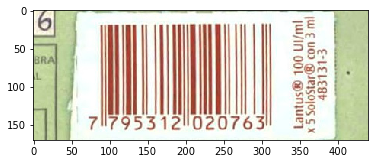

Prediction Ejem:  [1]
Troquel OK


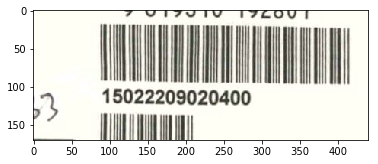

Prediction Ejem:  [0]
Troquel NOK


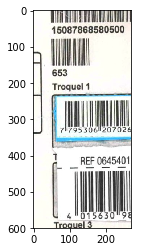

Prediction Ejem:  [1]
Troquel OK


In [21]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import image_data as imdg

def get_predic_image(test_img):
    test_image = cv2.imread(test_img)
    plt.imshow(test_image)
    plt.show()
    arr_test = [] 
    arr_test = imdg.get_image_flatten(test_img)
    pred = clf_logist_pol.predict(arr_test)
   
    print('Prediction Ejem: ', pred)

    if pred[0] == 1:    
       prediction = 'Troquel OK' 
    else:    
       prediction = 'Troquel NOK' 
    
    print (prediction)
    
    return pred

## IMAGEN DE TROQUEL NOK 
result = get_predic_image('data/test/1/barcode711.jpg')

## IMAGEN DE TROQUEL NOK 
result = get_predic_image('data/test/0/barcode65.jpg')

## 2do CASO TROQUEL NOK 
result = get_predic_image('data/test/0/barcode9310.jpg')


In [ ]:
## MODELO NAIVES BAYES 

In [22]:
# train the model
clf = GaussianNB()
clf.fit(trainData, trainLabels)

GaussianNB(priors=None)

In [79]:
# use the model to predict the labels of the test data
predictionsLabels = clf.predict(validData)
print(predictionsLabels)

expectedLabels = validLabels
print(expectedLabels)

[0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1]
[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]


In [80]:
from sklearn.metrics import confusion_matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion_matrix(validLabels,predictionsLabels),
             columns=["Predicted Class " + str(class_name) for class_name in [0,1]],
             index = ["Class " + str(class_name) for class_name in [0,1]])

print(confusion_df)

         Predicted Class 0  Predicted Class 1
Class 0                 26                  5
Class 1                  0                 31


In [33]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(validLabels, predictionsLabels))

# Calculo el score (Exactitud) con el dataset de testeo
score_test_bayes = clf.score(validData, validLabels)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_bayes = clf.score(trainData, trainLabels)

print('Test Accuracy (Exactitud):',score_test_bayes)
print('Train Accuracy (Exactitud):',score_train_bayes)
print('means class 1 (no aprobados):',clf.theta_[0,:])
print('means class 2 (aprobados):',clf.theta_[1,:])
print('vars class 1 (no aprobados):',clf.sigma_[0,:])
print('vars class 2 (aprobados):',clf.sigma_[1,:])

0.887096774194
Test Accuracy (Exactitud): 0.887096774194
Train Accuracy (Exactitud): 0.924731182796
means class 1 (no aprobados): [  1.43404398e-02   1.33937877e-02   1.24824168e-02   2.08039787e-02
   3.31279375e-02   6.16514497e-02   1.27941340e-01   3.53094153e-02
   8.17987620e-06   1.12478876e-04   1.72406741e-04   2.11800361e-05
   2.33710739e-06   1.46069212e-07   0.00000000e+00   0.00000000e+00
   2.76070823e-05   5.50680961e-05   4.38207650e-07   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   1.34383681e-05   2.92138429e-06   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.04496905e-06   2.92138424e-07   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   2.92138424e-07   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.000

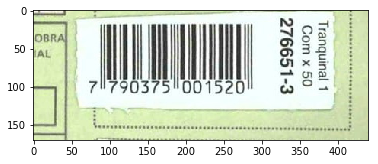

Prediction Ejem:  [1]
Troquel OK


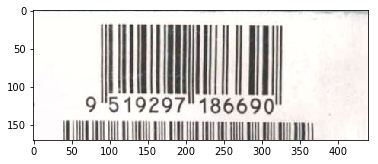

Prediction Ejem:  [1]
Troquel OK


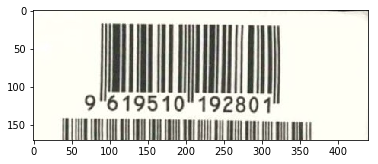

Prediction Ejem:  [0]
Troquel NOK


In [23]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import image_data as imdg

def get_predic_image(test_img):
    test_image = cv2.imread(test_img)
    plt.imshow(test_image)
    plt.show()
    arr_test = [] 
    arr_test = imdg.get_image_flatten(test_img)
    pred = clf_logist_pol.predict(arr_test)
   
    print('Prediction Ejem: ', pred)

    if pred[0] == 1:    
       prediction = 'Troquel OK' 
    else:    
       prediction = 'Troquel NOK' 
    
    print (prediction)
    
    return pred

## IMAGEN DE TROQUEL NOK 
result = get_predic_image('data/test/1/barcode6140.jpg')

## IMAGEN DE TROQUEL NOK 
result = get_predic_image('data/test/0/barcode8108.jpg')

## 2do CASO TROQUEL NOK 
result = get_predic_image('data/test/0/barcode76.jpg')

In [ ]:
# Clasificacion MLP

In [24]:
from sklearn.neural_network import MLPClassifier
from soluciones_helper import plot_boundaries, get_polynimial_set
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import image_data as imdg

print("[INFO] Leyendo imagenes ...")
# initialize the data matrix and labels list
data = []
labels = []

data_train = []
label_train = []


relevant_path = "data/train/"
data_train, labels_train = imdg.get_data_flatten(relevant_path)
print('Cantidad imagenes training : ', len(data_train))


[INFO] Leyendo imagenes ...
Cantidad imagenes training :  248


In [26]:
# partition the data into training and valid splits, using 75%
# of the data for training and the remaining 25% for testing
print("[INFO] constructing training/valid split...")
(trainData, validData, trainLabels, validLabels) = train_test_split(np.array(data_train), labels_train, test_size=0.25, random_state=42)


[INFO] constructing training/valid split...


In [28]:
#clf_MPL = MLPClassifier(solver='sgd',hidden_layer_sizes=(50,), activation='logistic', alpha=0.0, momentum=0, 
#                        max_iter=1000, random_state=5)

clf_MPL = MLPClassifier(solver='adam',hidden_layer_sizes=(50,), activation='relu', alpha=0.0, momentum=0, 
                      max_iter=1000, random_state=5)

# Entreno el modelo con el dataset de entrenamient
clf_MPL.fit(trainData, trainLabels)
# Calculo el score (Exactitud) con el dataset de testeo
score_test_MLP = clf_MPL.score(validData, validLabels)

# Calculo tambien el score del dataset de entrenamiento para comparar
score_train_MLP = clf_MPL.score(trainData, trainLabels)

print('Test Accuracy (Exactitud):',score_test_MLP)
print('Train Accuracy (Exactitud):',score_train_MLP) 

Test Accuracy (Exactitud): 0.935483870968
Train Accuracy (Exactitud): 0.940860215054


In [31]:
mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp.fit(trainData, trainLabels)
print("Test Accuracy (Exactitud): %f" % mlp.score(validData, validLabels))
print("Train Accuracy (Exactitud): %f" % mlp.score(trainData, trainLabels))
mlp.classes_

Iteration 1, loss = 0.91135826
Iteration 2, loss = 0.88563033
Iteration 3, loss = 0.85385231
Iteration 4, loss = 0.82028136
Iteration 5, loss = 0.78821333
Iteration 6, loss = 0.75982089
Iteration 7, loss = 0.73630038
Iteration 8, loss = 0.71781695
Iteration 9, loss = 0.70438299
Iteration 10, loss = 0.69551275
Iteration 11, loss = 0.68986399
Iteration 12, loss = 0.68671037
Iteration 13, loss = 0.68526374
Iteration 14, loss = 0.68450289
Iteration 15, loss = 0.68346596
Iteration 16, loss = 0.68186832
Iteration 17, loss = 0.67964614
Iteration 18, loss = 0.67622466
Iteration 19, loss = 0.67074309
Iteration 20, loss = 0.66577788
Iteration 21, loss = 0.66084370
Iteration 22, loss = 0.65396303
Iteration 23, loss = 0.64503426
Iteration 24, loss = 0.63420054
Iteration 25, loss = 0.62644767
Iteration 26, loss = 0.61242137
Iteration 27, loss = 0.60214658
Iteration 28, loss = 0.58854395
Iteration 29, loss = 0.57618920
Iteration 30, loss = 0.56403756
Iteration 31, loss = 0.54997244
Iteration 32, los

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Test Accuracy (Exactitud): 0.887097
Train Accuracy (Exactitud): 0.908602


array([0, 1])